In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import warnings
warnings.simplefilter("ignore")

In [41]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,34578,INN34579,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,14267,INN14268,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,809,INN00810,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,32372,INN32373,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,12804,INN12805,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [42]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [43]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'] , inplace=True)

In [44]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [45]:
df.shape

(29020, 18)

In [46]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [47]:
df.duplicated().sum()

np.int64(7695)

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(21325, 18)

In [50]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [51]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15194
Canceled         6131
Name: count, dtype: int64

###### Our data is imbalanced

In [52]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [53]:
data = df.copy()

In [54]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


##### UNIVARIATE ANALYSIS

In [55]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

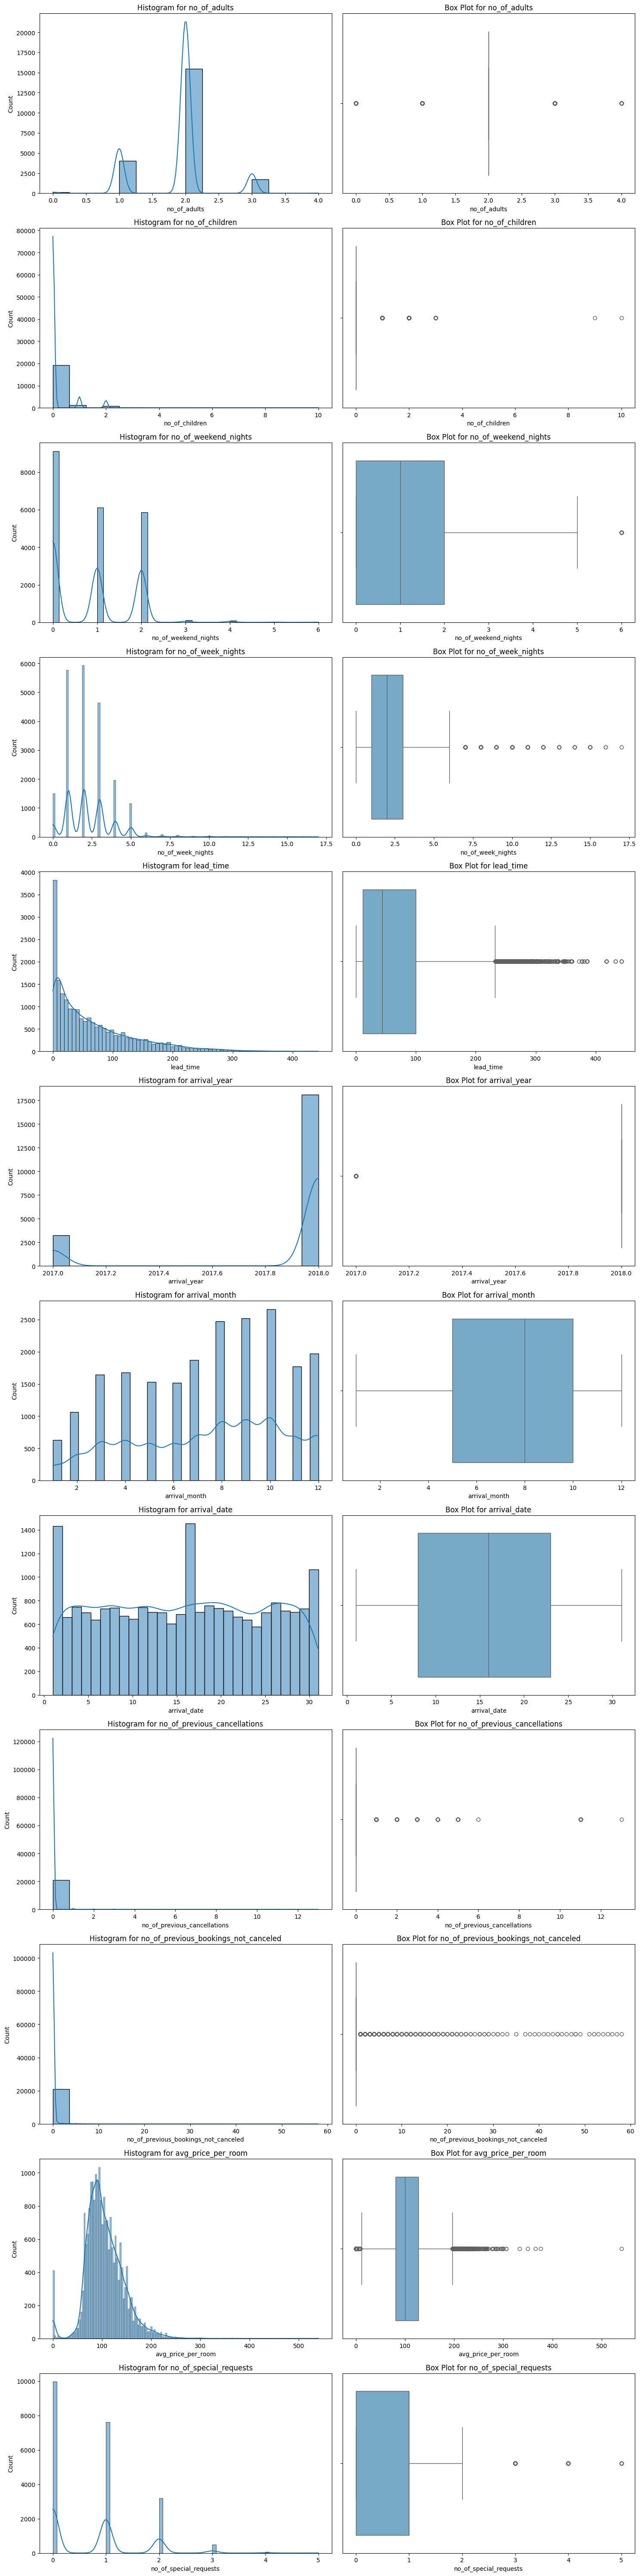

In [56]:
num_plot_dist(data , num_cols)

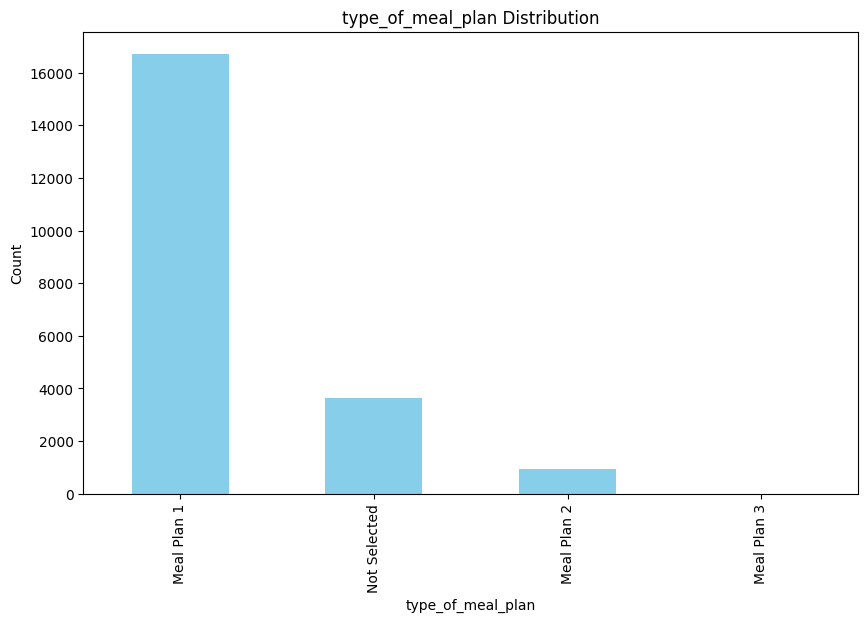

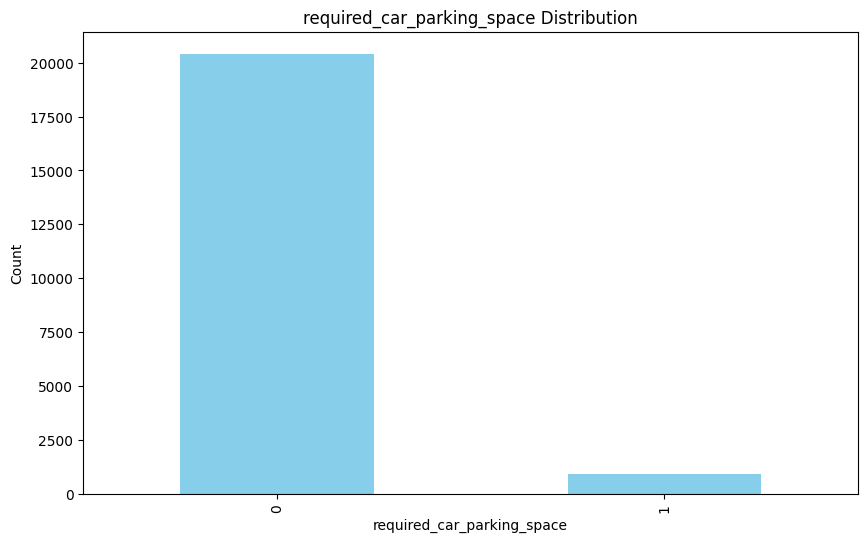

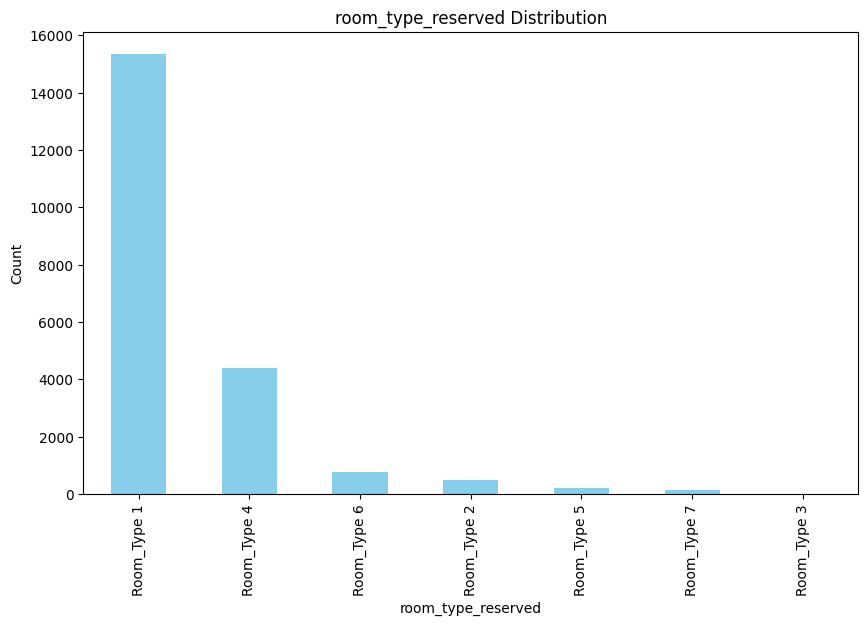

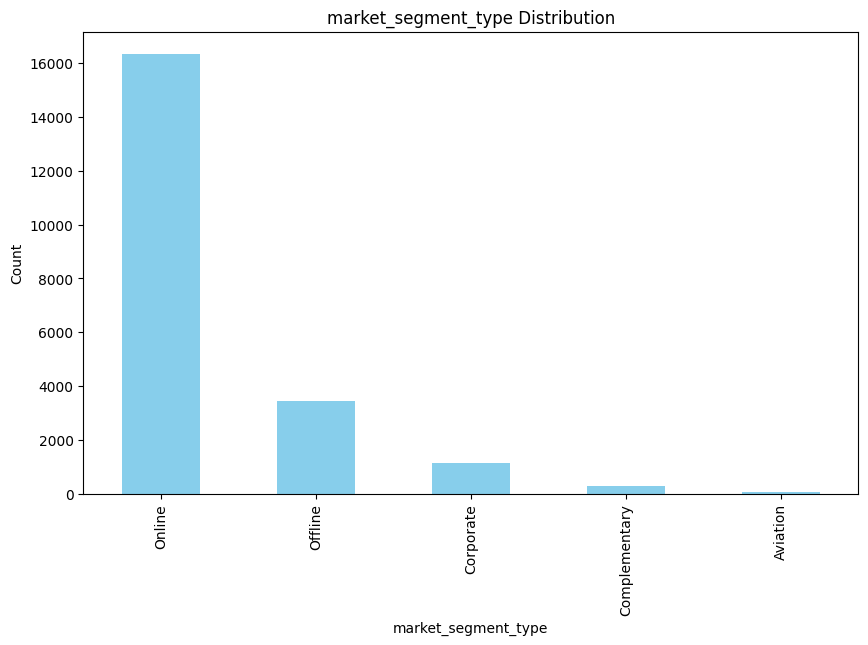

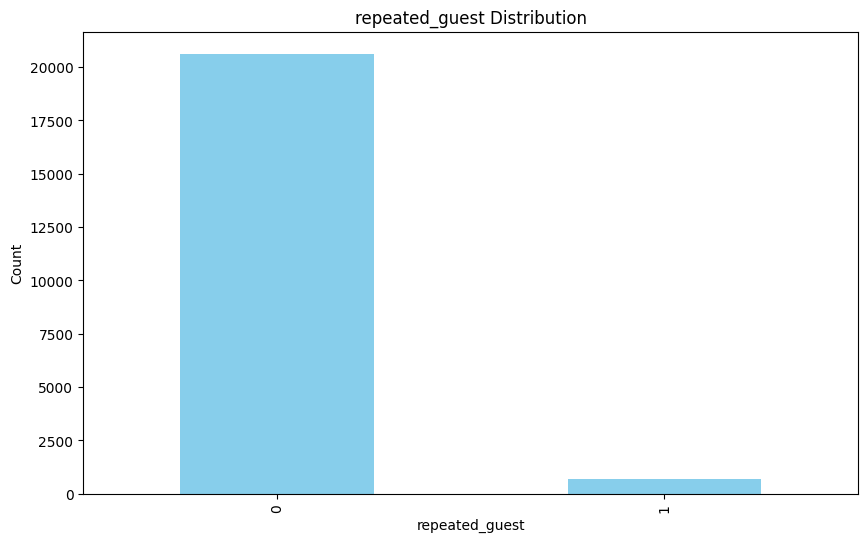

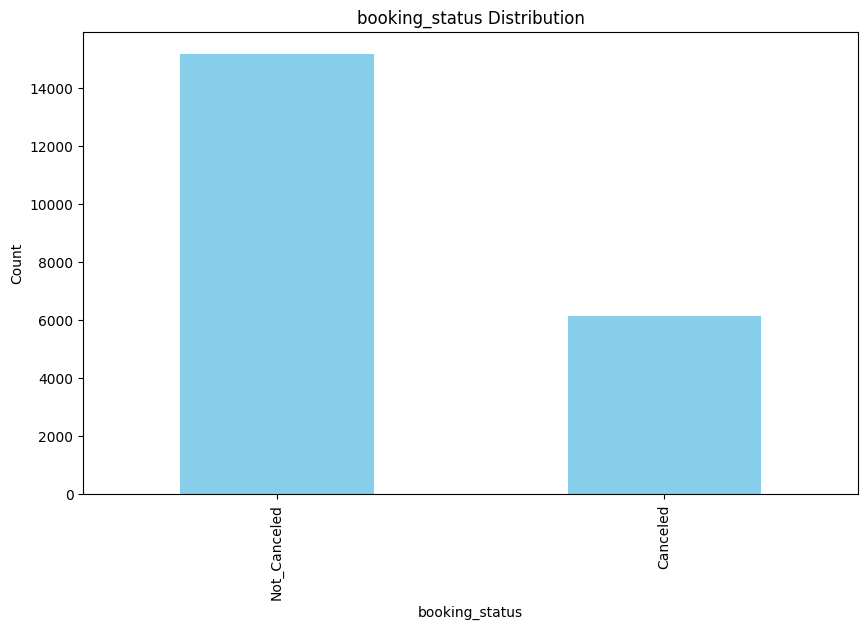

In [57]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [58]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

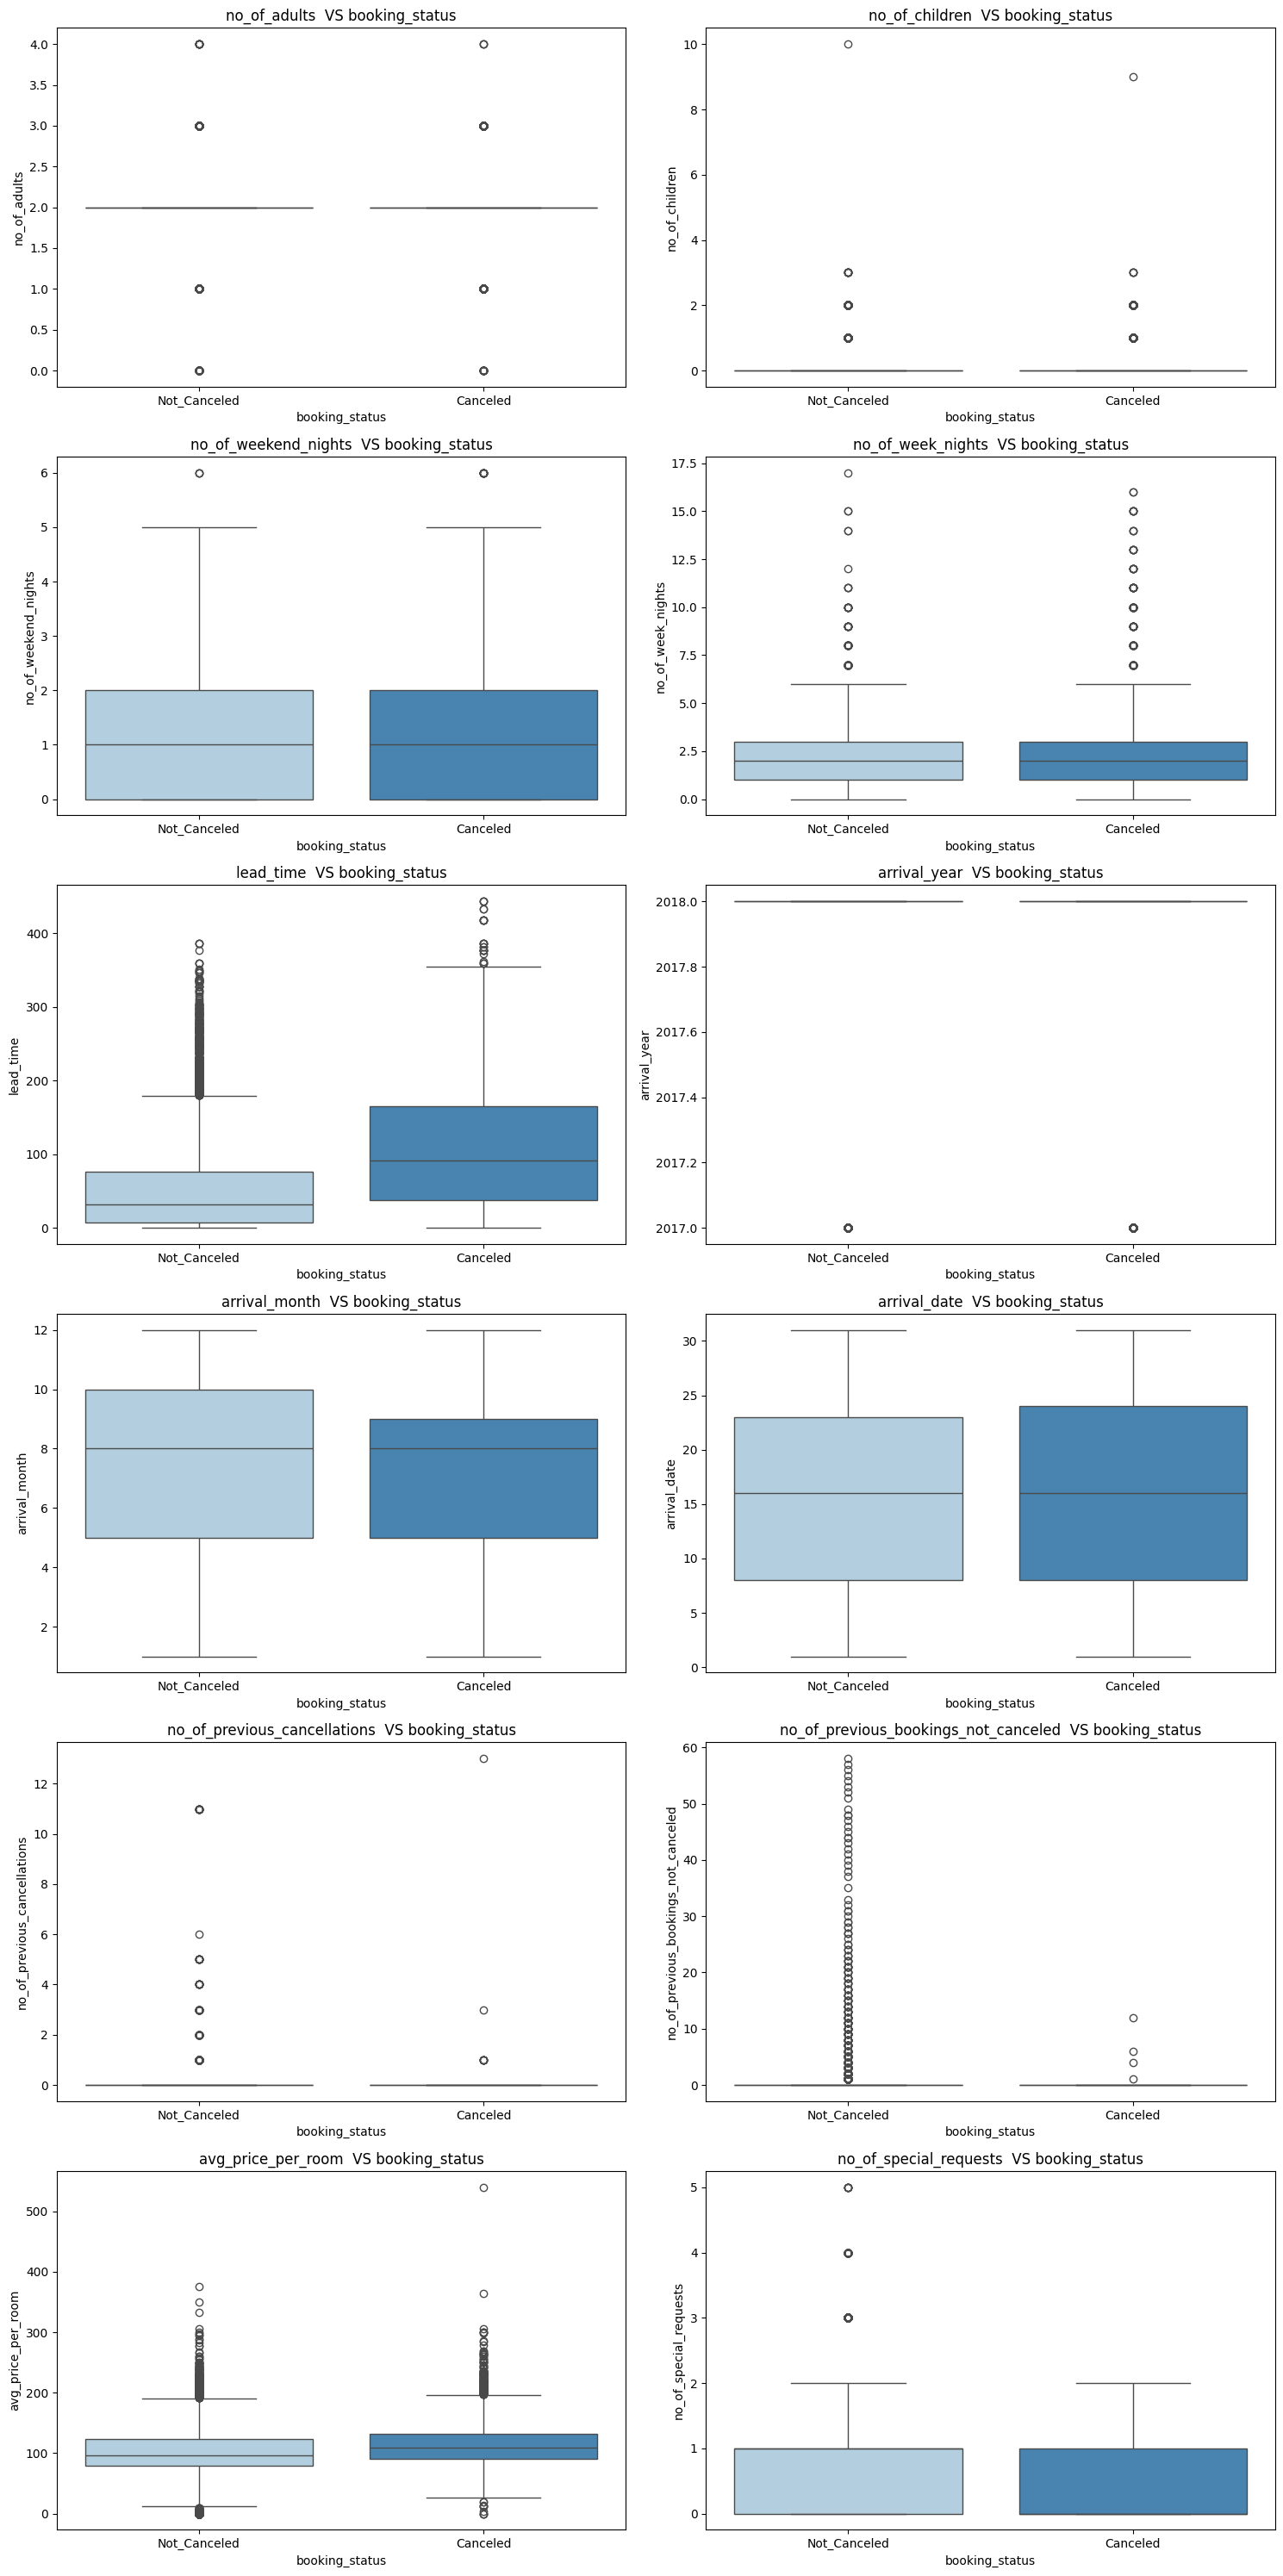

In [59]:
plot_bivariate_num(data , 'booking_status' , num_cols)

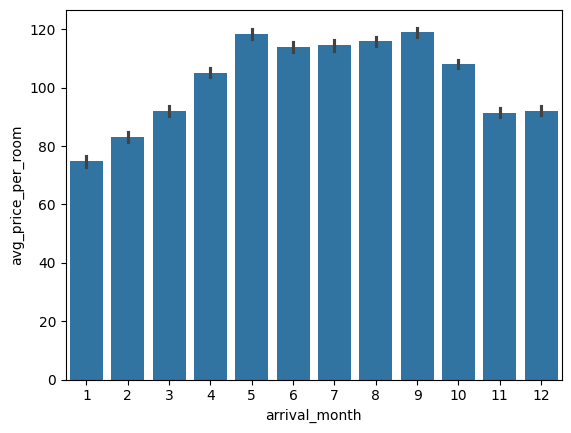

In [60]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [61]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

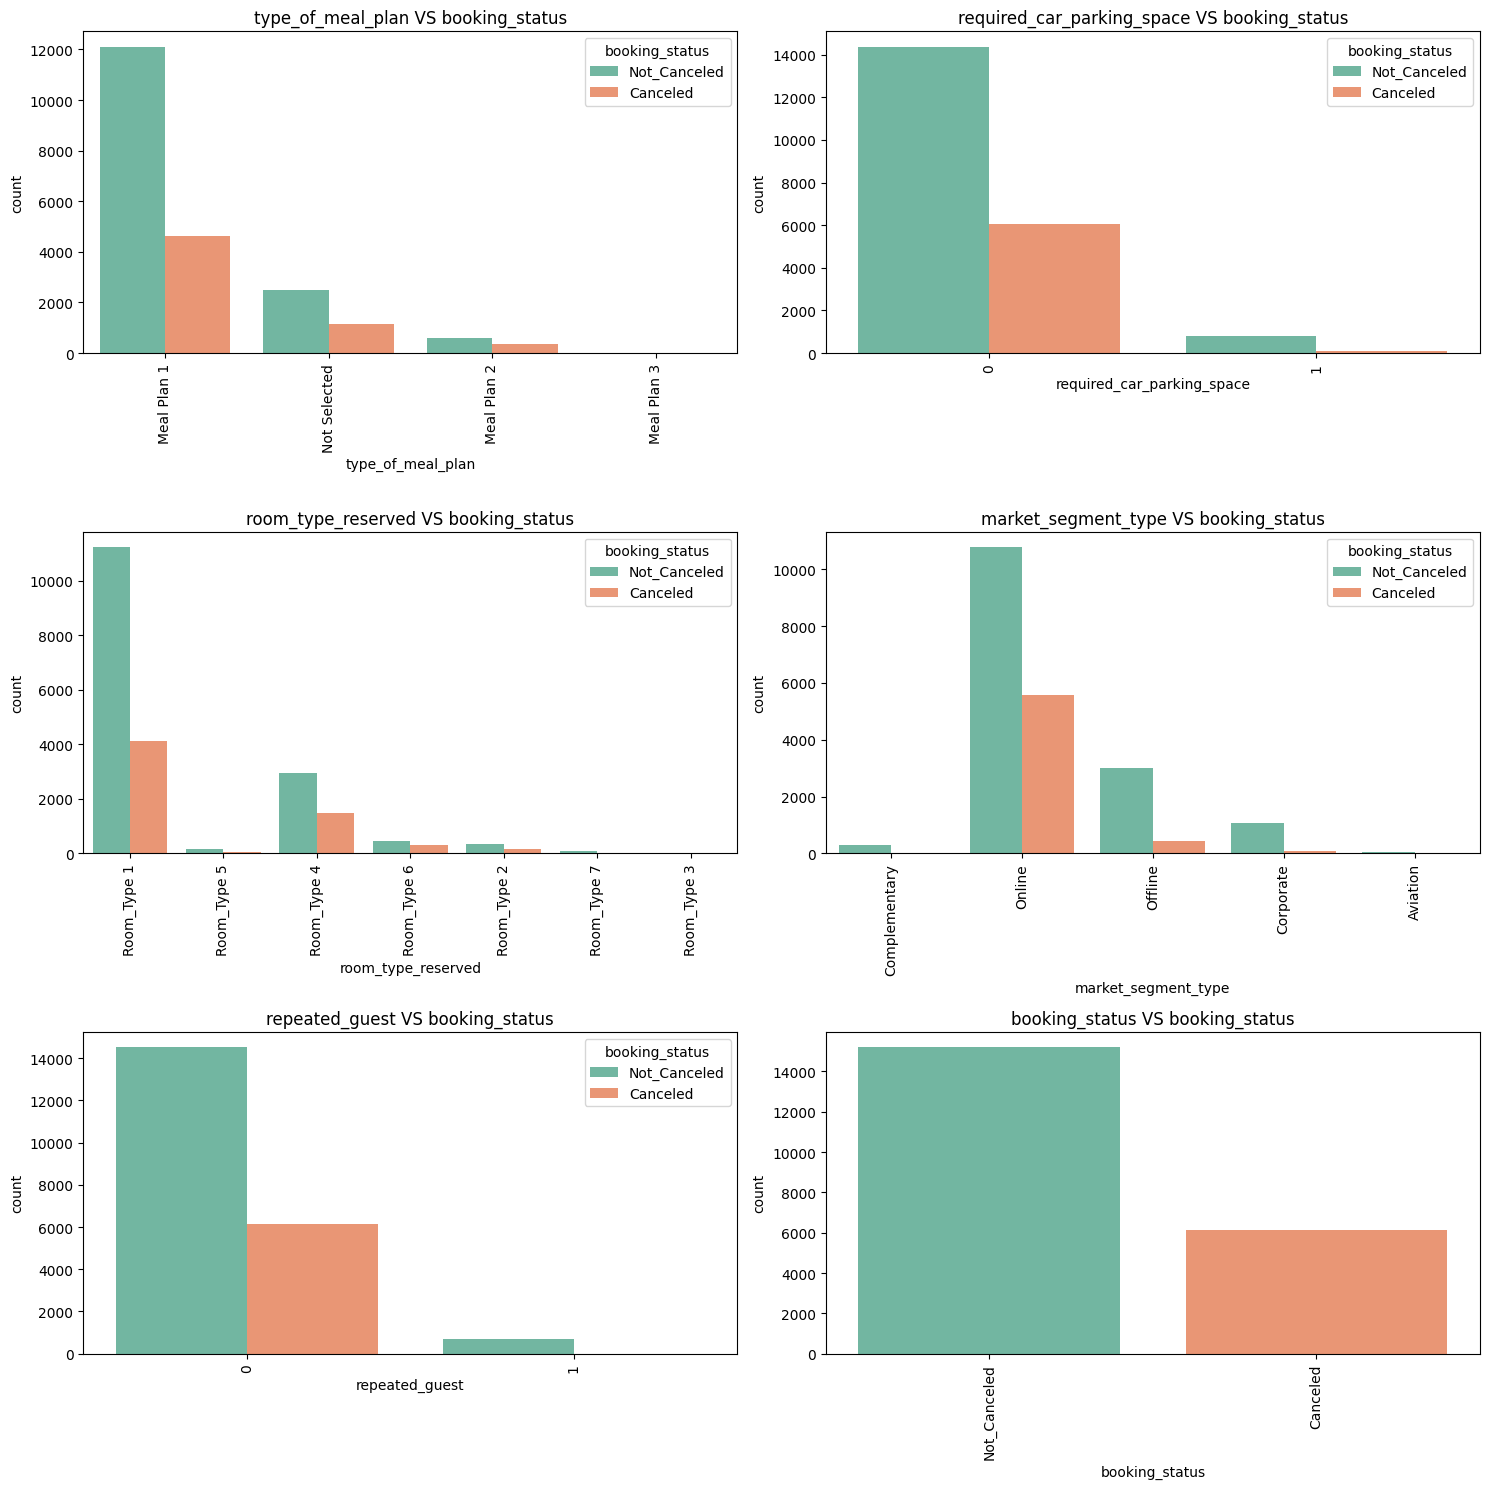

In [62]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

#### DATA PROCESSING

In [63]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21325 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21325 non-null  int64  
 1   no_of_children                        21325 non-null  int64  
 2   no_of_weekend_nights                  21325 non-null  int64  
 3   no_of_week_nights                     21325 non-null  int64  
 4   type_of_meal_plan                     21325 non-null  object 
 5   required_car_parking_space            21325 non-null  int64  
 6   room_type_reserved                    21325 non-null  object 
 7   lead_time                             21325 non-null  int64  
 8   arrival_year                          21325 non-null  int64  
 9   arrival_month                         21325 non-null  int64  
 10  arrival_date                          21325 non-null  int64  
 11  market_segment_type 

In [65]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [67]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [68]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,0,0,0,0,2017,9,17,1,0,0,0,0.0,0,1
1,1,0,1,0,3,0,4,3,2018,9,26,4,0,0,0,195.0,0,1
2,1,0,1,1,0,0,0,0,2018,1,2,4,0,0,0,86.0,0,1
3,2,0,1,2,0,0,0,5,2017,10,19,3,0,0,0,90.0,0,1
4,2,0,2,5,0,0,0,247,2018,9,26,4,0,0,0,100.3,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21325 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21325 non-null  int64  
 1   no_of_children                        21325 non-null  int64  
 2   no_of_weekend_nights                  21325 non-null  int64  
 3   no_of_week_nights                     21325 non-null  int64  
 4   type_of_meal_plan                     21325 non-null  int64  
 5   required_car_parking_space            21325 non-null  int64  
 6   room_type_reserved                    21325 non-null  int64  
 7   lead_time                             21325 non-null  int64  
 8   arrival_year                          21325 non-null  int64  
 9   arrival_month                         21325 non-null  int64  
 10  arrival_date                          21325 non-null  int64  
 11  market_segment_type 

In [70]:
### Multicollinearity

In [71]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [73]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [74]:
vif_data

,feature,VIF
0,const,4.099586e+07
1,no_of_adults,1.330653e+00
2,no_of_children,1.280503e+00
3,no_of_weekend_nights,1.076521e+00
4,no_of_week_nights,1.133501e+00
5,type_of_meal_plan,1.176542e+00
6,required_car_parking_space,1.033723e+00
7,room_type_reserved,1.559324e+00
8,lead_time,1.406160e+00
9,arrival_year,1.289045e+00


#### Our data dont have any multicollinearity

In [75]:
corr = df.corr()

In [76]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.040521,0.089239,0.114448,-0.006697,0.002112,0.272756,0.153753,0.099433,0.007789,0.018548,0.312083,-0.239510,-0.065868,-0.146162,0.324889,0.150687,-0.096987
no_of_children,-0.040521,1.000000,0.012077,0.015739,-0.103926,0.015474,0.360213,0.007986,0.034024,0.000612,0.029354,0.099679,-0.048258,-0.021476,-0.028921,0.350603,0.101615,-0.063995
no_of_weekend_nights,0.089239,0.012077,1.000000,0.232266,-0.042480,-0.053972,0.027680,0.130421,0.031886,0.011988,0.004725,0.094205,-0.087572,-0.028679,-0.035864,0.000387,0.015247,-0.073793
no_of_week_nights,0.114448,0.015739,0.232266,1.000000,-0.079454,-0.058385,0.088736,0.225860,0.017941,0.033003,-0.000549,0.116748,-0.119250,-0.038560,-0.059999,0.016285,0.033995,-0.125572
type_of_meal_plan,-0.006697,-0.103926,-0.042480,-0.079454,1.000000,-0.019898,-0.246920,-0.048212,0.097165,0.007883,-0.007028,0.181386,-0.070542,-0.010938,-0.045875,-0.104114,-0.011582,-0.037901
required_car_parking_space,0.002112,0.015474,-0.053972,-0.058385,-0.019898,1.000000,0.016551,-0.043752,0.004186,-0.011874,-0.004174,-0.042907,0.114909,0.033122,0.061537,0.052135,0.067029,0.090042
room_type_reserved,0.272756,0.360213,0.027680,0.088736,-0.246920,0.016551,1.000000,-0.020824,0.087056,-0.001137,0.030436,0.088500,-0.042101,-0.017596,-0.022417,0.491085,0.090192,-0.070656
lead_time,0.153753,0.007986,0.130421,0.225860,-0.048212,-0.043752,-0.020824,1.000000,0.167458,0.134028,0.036435,0.138066,-0.148284,-0.054566,-0.086475,-0.045572,-0.008188,-0.370313
arrival_year,0.099433,0.034024,0.031886,0.017941,0.097165,0.004186,0.087056,0.167458,1.000000,-0.323476,0.013058,0.110685,-0.010733,0.009326,0.024672,0.176313,-0.001345,-0.152981
arrival_month,0.007789,0.000612,0.011988,0.033003,0.007883,-0.011874,-0.001137,0.134028,-0.323476,1.000000,-0.018516,-0.017841,-0.005282,-0.042759,-0.004599,0.061871,0.137535,0.018104


<Axes: >

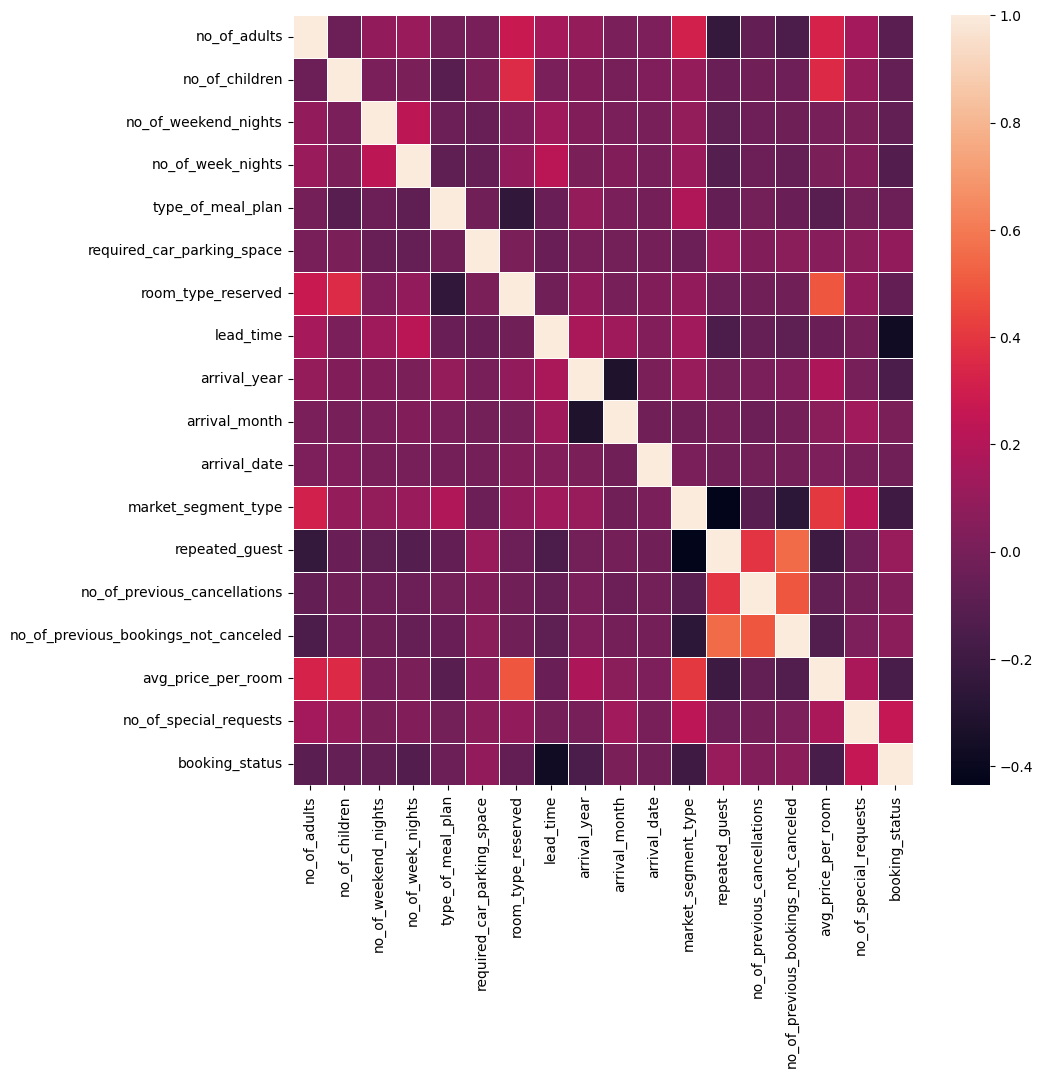

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [78]:
#### Skewness

In [79]:
skewness  = df.skew()

In [80]:
skewness

no_of_adults                            -0.284713
no_of_children                           3.959571
no_of_weekend_nights                     0.650873
no_of_week_nights                        1.562449
type_of_meal_plan                        1.640058
required_car_parking_space               4.539907
room_type_reserved                       1.389148
lead_time                                1.406736
arrival_year                            -1.952187
arrival_month                           -0.290009
arrival_date                             0.002855
market_segment_type                     -2.360891
repeated_guest                           5.273472
no_of_previous_cancellations            21.625190
no_of_previous_bookings_not_canceled    16.344381
avg_price_per_room                       0.604370
no_of_special_requests                   0.921614
booking_status                          -0.939076
dtype: float64

In [81]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [82]:
#### Imablanced Data

In [83]:
df["booking_status"].value_counts()

booking_status
1    15194
0     6131
Name: count, dtype: int64

In [84]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [85]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [86]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [87]:
y.value_counts()

booking_status
1    15194
0     6131
Name: count, dtype: int64

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [90]:
y_res

0        1
1        1
2        1
3        1
4        0
        ..
30383    0
30384    0
30385    0
30386    0
30387    0
Name: booking_status, Length: 30388, dtype: int64

In [91]:
y_res.value_counts()

booking_status
1    15194
0    15194
Name: count, dtype: int64

In [92]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [93]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,0,0,0,0,2017,9,17,1,0.0,0.0,0.0,0.0,0,1
1,1,0,1,0,3,0,4,3,2018,9,26,4,0.0,0.0,0.0,195.0,0,1
2,1,0,1,1,0,0,0,0,2018,1,2,4,0.0,0.0,0.0,86.0,0,1
3,2,0,1,2,0,0,0,5,2017,10,19,3,0.0,0.0,0.0,90.0,0,1
4,2,0,2,5,0,0,0,247,2018,9,26,4,0.0,0.0,0.0,100.3,1,0


In [94]:
balanced_df.shape

(30388, 18)

In [95]:
df = balanced_df.copy()

In [96]:
df.shape

(30388, 18)

In [97]:
#### Feature Selection

In [98]:
len(df.columns)

18

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [101]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [102]:
feature_importance = model.feature_importances_

In [103]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [104]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [105]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [106]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,0,0,0.0,9,17,1,1,0,0,0,1
1,3,0,195.0,9,26,4,0,1,3,4,1
2,0,0,86.0,1,2,4,1,1,0,0,1
3,5,0,90.0,10,19,3,2,1,0,0,1
4,247,1,100.3,9,26,4,5,2,0,0,0


In [107]:
len(top_10_df.columns)

11

In [108]:
df = top_10_df.copy()

### MODEL SELECTION

In [109]:
!pip install xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [111]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [112]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [113]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [114]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [115]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12171, number of negative: 12139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24310, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500658 -> initscore=0.002633
[LightGBM] [Info] Start training from score 0.002633


In [116]:
metrics_df= pd.DataFrame(metrics)

In [117]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.888779,0.887166,0.889514,0.888338
1,LogisticRegression,0.773774,0.789123,0.743963,0.765878
2,Gradient Boosting,0.842382,0.827258,0.863381,0.844934
3,Suuport vector classifier,0.727542,0.730367,0.716838,0.723539
4,Decsion Tree,0.836788,0.845291,0.822362,0.833669
5,KNN,0.778546,0.842664,0.682104,0.753931
6,Naive Bayes,0.776900,0.802981,0.730731,0.765154
7,XGboost,0.871339,0.866296,0.876613,0.871424
8,Adaboost,0.808819,0.806590,0.809792,0.808188
9,LGBM,0.868542,0.857326,0.882567,0.869764


In [118]:
##### TRAIN OUR RF MODEL

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [120]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [121]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [122]:
rf = RandomForestClassifier(random_state=42)

In [123]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [124]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [125]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   3.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.3s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15dddab10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e31a7e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e31a000>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15de14830>},
                   random_state=42, scoring='accuracy', verbose=2)

In [126]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [127]:
best_rf_model = random_search.best_estimator_

In [128]:
y_pred = best_rf_model.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [130]:
accuracy

0.8841724251398486

In [131]:
precision

0.8785504407443683

In [132]:
recall

0.8901753225272908

In [133]:
f1

0.8843246795925074

In [134]:
### Save this model

In [135]:
import joblib

In [136]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [137]:
loaded_model=joblib.load("random_forest.pkl")

In [138]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
24386,303,0,77.504369,8,19,3,2,1,0,0


In [139]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [140]:
predictions=loaded_model.predict(new_data)

In [141]:
predictions

array([1])